# CSIT456 Lab 3: Linear Model for Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 10


In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### About the data set

Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian.
Donor: Nick Street.
Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

**Data Set Characteristics:**

1. Number of Instances: 569
2. Number of Attributes: 30 numeric, predictive attributes and the class
3. Class Distribution: 212 - Malignant (class 0), 357 - Benign (class 1)


In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
data = load_breast_cancer()


In [4]:
print (data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
data.data.shape

(569, 30)

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

### Data Preparation

#### Question 1 [5 points]
Prepare the data as the following steps:
1. Create a numpy array **X** for all the predictor variables, **y** for the target variables.
2. Split the data to train set (70%) and test set (30%) and allow the ra. 

In [9]:
x = data.data
y= data.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3)

### Question 2. Classification by Logistic Regression

#### Question 2.1 [5 points]

1. Create a logistic regression model **reg** and train it by the train set.
2. Predict the test set using **reg** and store the predicted values in a numpy array **y_pred_lr**.

In [10]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression().fit(x_train, y_train)
y_pred_lr = reg.predict(x_test)

y_pred_lr

c:\program files\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

#### Question 2.2 [10 points] Confusion Matrix
Compare **y_pred_lr** with **y_test** and print the confusion matrix.

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_lr))

[[ 60   6]
 [  3 102]]


#### Question 2.3 [10 points] Precision, Recall and F1-score
Compare **y_pred_lr** with **y_test** and print the evaluation values of **precision**, **recall** and **f1-score**. 

In [12]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#### Question 2.4 [10 points] Draw ROC Curve
Plot the ROC curve of **reg**

Note: Use **predict_proba** and get probability estimates of the positive class. It will be the assigned as **y_score** of **roc_curve**.

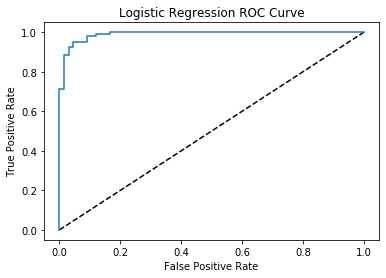

In [15]:
y_pred_prob = reg.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.savefig("LR-ROC.png")

#### Question 2.5 [10 points] AUC Score
Print the AUC score of **reg**.

In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prob)

0.9896103896103896